In [11]:
from heapq import merge
from re import I
import sys
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
global showDataBool
global showMatrixBool
numberOfClusters = 0 
arrGraph = []

def fromInput():
    data = []
    try:
        size = float(input("Size of matrix: "))
        for i in range(size):
            row = list(map(float, input(fr"Row {i}: ").strip().split()))
            numbers = np.array(row)
            if numbers.size != size:
                quit()
            data.append(numbers)
    except:
        print("Error")
        quit()
    return np.array(data)

def fromFile(path):
    try:
        data = []
        dataFile = open(path, "r")
        row = list(map(float, dataFile.readline().strip().split()))
        size = len(row)
        data.append(np.array(row))
        i = 1
        while size > i:
            numbers = np.array(list(map(float, dataFile.readline().strip().split())))
            if numbers.size != size:
                quit()
            data.append(numbers)
            i += 1
        dataFile.close()
    except:
        print("Error")
        quit()
    return np.array(data)

def get_edge_attributes(G, name):
    edges = G.edges(data=True)
    return dict( (x[:-1], x[-1][name]) for x in edges if name in x[-1] )

def showData(data):
    if showMatrixBool:
        print(data)

def initTree(data):
    for i in range(len(data)):
        newLeaf = "L"+str(i)
        G.add_node(newLeaf)
        arrGraph.append(newLeaf)

def countTotalDistance(data):
    arr = []
    for i in data:
        arr.append(np.sum(i))
    return arr

def createDMatrix(data, arr):
    dataD = []
    n = len(data)
    for i in range(n):
        arrD = []
        for j in range(n):
            arrD.append((n - 2)*data[i][j] - arr[i] - arr[j])
        arrD[i] = 0
        dataD.append(arrD)
    return np.array(dataD)

def idmin(data):
    iId = 0
    jId = 0
    minValue = math.inf
    n = len(data)
    for i in range(n):
        for j in range(i + 1, n):
            if minValue > data[i][j]:
                minValue = data[i][j]
                iId = i
                jId = j
    return iId, jId

def countDelta(arr, i, j):
    delta = (arr[i] - arr[j]) / (len(arr) - 2)
    return delta

def countLimb(value, delta):
    limbI = 1/2 * (value + delta)
    limbJ = 1/2 * (value - delta)
    return limbI, limbJ

def updateTree(i, j, limbI, limbJ):
    global numberOfClusters
    newCluster = "C"+str(numberOfClusters)
    numberOfClusters += 1
    G.add_node(newCluster)
    G.add_edge(arrGraph[i], newCluster, weight = limbI)
    G.add_edge(arrGraph[j], newCluster, weight = limbJ)
    arrGraph.pop(j)
    arrGraph.pop(i)
    arrGraph.insert(i, newCluster)

def updateMatrix(data, iId, jId):
    n = data.shape[0]
    newData = np.zeros((n-1,n-1))

    ii = jj = 1
    for i in range(n):
        if i == iId or i == jId:
            continue
        for j in range(n):
            if j == iId or j == jId:
                continue
            newData[ii][jj] = data[i][j]
            jj += 1
        ii += 1
        jj = 1
            
    ii = 1
    for i in range (n):
        if i == iId or i == jId:
            continue
        newData[0][ii] = (data[iId][i] + data[jId][i] - data[iId][jId]) / 2.
        newData[ii][0] = (data[iId][i] + data[jId][i] - data[iId][jId]) / 2.
        ii += 1

    return newData

def updateFinalTree(data):
    G.add_edge(arrGraph[0], arrGraph[1], weight = data[0][1])
    arrGraph.pop()
    arrGraph.pop()

def neighborJoining(data):
    showData(data)
    initTree(data)
    while len(data) > 2:
        totalDistance = countTotalDistance(data)
        dataD = createDMatrix(data, totalDistance)
        i, j = idmin(dataD)
        delta = countDelta(totalDistance, i, j)
        limbI, limbJ = countLimb(data[i][j], delta)
        updateTree(i, j, limbI, limbJ) if i < j else updateTree(j, i, limbI, limbJ)
        data = updateMatrix(data, i, j)
        showData(data)
    updateFinalTree(data)

[[ 0.  5.  4.  7.  6.  8.]
 [ 5.  0.  7. 10.  9. 11.]
 [ 4.  7.  0.  7.  6.  8.]
 [ 7. 10.  7.  0.  5.  9.]
 [ 6.  9.  6.  5.  0.  8.]
 [ 8. 11.  8.  9.  8.  0.]]
[[0. 3. 6. 5. 7.]
 [3. 0. 7. 6. 8.]
 [6. 7. 0. 5. 9.]
 [5. 6. 5. 0. 8.]
 [7. 8. 9. 8. 0.]]
[[0. 5. 4. 6.]
 [5. 0. 5. 9.]
 [4. 5. 0. 8.]
 [6. 9. 8. 0.]]
[[0. 4. 3.]
 [4. 0. 5.]
 [3. 5. 0.]]
[[0. 2.]
 [2. 0.]]
Nodes: ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'C0', 'C1', 'C2', 'C3']
Edges with weights: {('L0', 'C0'): 1.0, ('L1', 'C0'): 4.0, ('L2', 'C1'): 2.0, ('L3', 'C3'): 3.0, ('L4', 'C3'): 2.0, ('L5', 'C2'): 5.0, ('C0', 'C1'): 1.0, ('C1', 'C2'): 1.0, ('C2', 'C3'): 1.0}


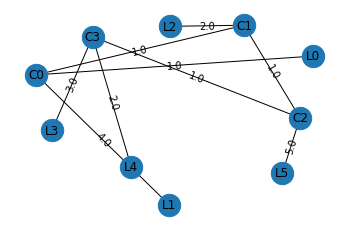

In [12]:
if __name__=='__main__':
    showMatrixBool = True
    showDataBool = True
    #data = fromInput()
    data = fromFile(fr"input\test8.txt")
    neighborJoining(data)
    pos = nx.spring_layout(G, k=2.15, iterations=20)
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if showDataBool:
        print("Nodes:",G.nodes)
        print("Edges with weights:", get_edge_attributes(G, "weight"))
    nx.draw(G, pos, node_size=500,edge_cmap=plt.cm.Reds,with_labels=True)